In [1]:
import os
os.chdir('..')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


> # Forecasting future sales for Rossmann Pharmaceuticals across various stores

>>## EDA Analysis

>>> ### Load Dataset 

In [2]:
train_data_path = 'Data/train.csv'
test_data_path ='Data/test.csv'
store_data_path ='Data/store.csv'

In [3]:

from scripts.data_loader import load_data

In [4]:
train_data, test_data, store_data = load_data(train_data_path,test_data_path,store_data_path)


2025-01-03 06:33:07,933 - INFO - Loading data from file...
2025-01-03 06:33:09,542 - INFO - Train Data, Test Data and Store Data loaded with shape (1017209, 9), (41088, 8), and (1115, 10) respectively


### Check Loaded Datasets

#### Train Datasets

In [5]:
train_data.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Test Datasets

In [7]:
test_data.head(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


#### Store Dataset

In [9]:
store_data.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [10]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


>>> ## Cleaning the data

The data cleaning process will include developing pipelines to identify and address outliers and missing data effectively.

>>>>## Check missing value

In [11]:
from scripts.data_cleaning import find_missing_values


#### Find missing values of Train Dataset

In [12]:
find_missing_values(train_data)


2025-01-03 06:33:10,236 - INFO - Finding missing values in DataFrame...
2025-01-03 06:33:10,236 - INFO - Finding missing values in DataFrame...


From 9 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


#### Find Missing Values of Test Dataset

In [13]:
find_missing_values(test_data)


2025-01-03 06:33:10,588 - INFO - Finding missing values in DataFrame...
2025-01-03 06:33:10,588 - INFO - Finding missing values in DataFrame...


From 8 columns selected, there are 1 columns with missing values.


,Missing values,Percent of Total Values,DataType
Open,11,0.0,float64


#### Find missing values of Store Dataset

In [14]:
find_missing_values(store_data)


2025-01-03 06:33:10,668 - INFO - Finding missing values in DataFrame...
2025-01-03 06:33:10,668 - INFO - Finding missing values in DataFrame...


From 10 columns selected, there are 6 columns with missing values.


,Missing values,Percent of Total Values,DataType
Promo2SinceYear,544,48.8,float64
Promo2SinceWeek,544,48.8,float64
PromoInterval,544,48.8,object
CompetitionOpenSinceMonth,354,31.7,float64
CompetitionOpenSinceYear,354,31.7,float64
CompetitionDistance,3,0.3,float64


>>>>## Handling missing values

Training Data have no missing value ,Test data have one  missing value and store data have 6 missing value

In [15]:
from scripts.data_cleaning import replace_missing_values


In [16]:
test_data=replace_missing_values(test_data)


2025-01-03 06:33:10,789 - INFO - Replacing missing values...
2025-01-03 06:33:10,789 - INFO - Replacing missing values...
2025-01-03 06:33:10,807 - INFO - Replacing missing values in column 'Id' with mean: 41088
2025-01-03 06:33:10,807 - INFO - Replacing missing values in column 'Id' with mean: 41088
2025-01-03 06:33:10,816 - INFO - Replacing missing values in column 'Store' with mean: 1115
2025-01-03 06:33:10,816 - INFO - Replacing missing values in column 'Store' with mean: 1115
2025-01-03 06:33:10,828 - INFO - Replacing missing values in column 'DayOfWeek' with mean: 7
2025-01-03 06:33:10,828 - INFO - Replacing missing values in column 'DayOfWeek' with mean: 7
2025-01-03 06:33:10,848 - INFO - Replacing missing values in column 'Open' with mean: 1.0
2025-01-03 06:33:10,848 - INFO - Replacing missing values in column 'Open' with mean: 1.0
2025-01-03 06:33:10,864 - INFO - Replacing missing values in column 'Promo' with mean: 1
2025-01-03 06:33:10,864 - INFO - Replacing missing values i

In [17]:
find_missing_values(test_data)

2025-01-03 06:33:10,997 - INFO - Finding missing values in DataFrame...
2025-01-03 06:33:10,997 - INFO - Finding missing values in DataFrame...


From 8 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


In [18]:
store_data=replace_missing_values(store_data)

2025-01-03 06:33:11,108 - INFO - Replacing missing values...
2025-01-03 06:33:11,108 - INFO - Replacing missing values...
2025-01-03 06:33:11,127 - INFO - Replacing missing values in column 'Store' with mean: 1115
2025-01-03 06:33:11,127 - INFO - Replacing missing values in column 'Store' with mean: 1115
2025-01-03 06:33:11,145 - INFO - Replacing missing values in column 'CompetitionDistance' with mean: 75860.0
2025-01-03 06:33:11,145 - INFO - Replacing missing values in column 'CompetitionDistance' with mean: 75860.0
2025-01-03 06:33:11,158 - INFO - Replacing missing values in column 'CompetitionOpenSinceMonth' with mean: 12.0
2025-01-03 06:33:11,158 - INFO - Replacing missing values in column 'CompetitionOpenSinceMonth' with mean: 12.0
2025-01-03 06:33:11,170 - INFO - Replacing missing values in column 'CompetitionOpenSinceYear' with mean: 2015.0
2025-01-03 06:33:11,170 - INFO - Replacing missing values in column 'CompetitionOpenSinceYear' with mean: 2015.0
2025-01-03 06:33:11,179 - 

In [19]:
find_missing_values(store_data)

2025-01-03 06:33:11,281 - INFO - Finding missing values in DataFrame...
2025-01-03 06:33:11,281 - INFO - Finding missing values in DataFrame...


From 10 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


In [20]:
store_data.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4.0,2015.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
5,6,a,a,310.0,12.0,2013.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
6,7,a,c,24000.0,4.0,2013.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
7,8,a,a,7520.0,10.0,2014.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
8,9,a,c,2030.0,8.0,2000.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
9,10,a,a,3160.0,9.0,2009.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"


>>> ### Check Outlier

In [21]:
from scripts.data_cleaning import get_outlier_summary


#### Outlier for Train Data

In [22]:
get_outlier_summary(train_data,['Sales','Customers'])

2025-01-03 06:33:11,444 - INFO - Calculating outlier summary for numerical columns...
2025-01-03 06:33:11,444 - INFO - Calculating outlier summary for numerical columns...


From 9 selected numerical columns, there are 2 columns with outlier values.


,Variable,Number of Outliers
0,Sales,26694
1,Customers,38095


Box-plot before removing outliers For train Data

2025-01-03 06:33:11,799 - INFO - Creating box plots for outlier detection...
2025-01-03 06:33:11,799 - INFO - Creating box plots for outlier detection...


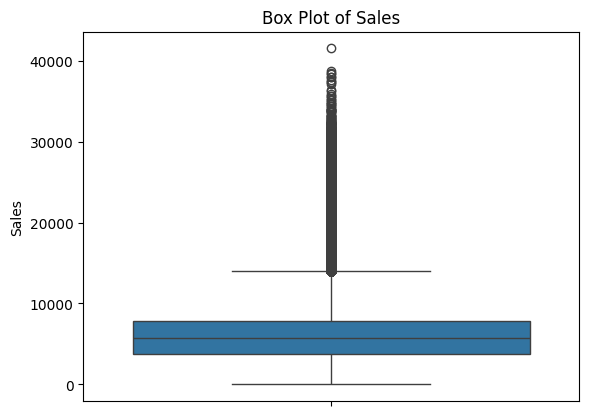

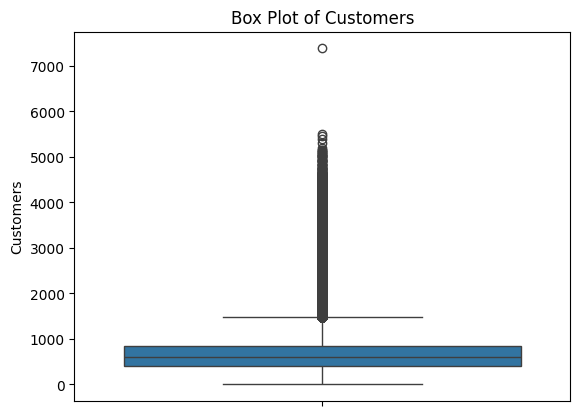

In [23]:
from scripts.data_cleaning import boxPlotForDetectOutliers
boxPlotForDetectOutliers(train_data,['Sales','Customers'])

#### Outlier for Test Data

In [24]:
get_outlier_summary(test_data,['Id','Store','DayOfWeek'])


2025-01-03 06:33:22,697 - INFO - Calculating outlier summary for numerical columns...
2025-01-03 06:33:22,697 - INFO - Calculating outlier summary for numerical columns...


From 8 selected numerical columns, there are 0 columns with outlier values.


,Variable,Number of Outliers
0,Id,0
1,Store,0
2,DayOfWeek,0


#### Outlier for Store Data

In [25]:
get_outlier_summary(store_data,['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear'])


2025-01-03 06:33:22,785 - INFO - Calculating outlier summary for numerical columns...
2025-01-03 06:33:22,785 - INFO - Calculating outlier summary for numerical columns...


From 10 selected numerical columns, there are 2 columns with outlier values.


,Variable,Number of Outliers
0,CompetitionDistance,110
1,CompetitionOpenSinceMonth,0
2,CompetitionOpenSinceYear,11
3,Promo2SinceWeek,0
4,Promo2SinceYear,0


Box-plot before removing outliers For Store Data

2025-01-03 06:33:22,903 - INFO - Creating box plots for outlier detection...
2025-01-03 06:33:22,903 - INFO - Creating box plots for outlier detection...


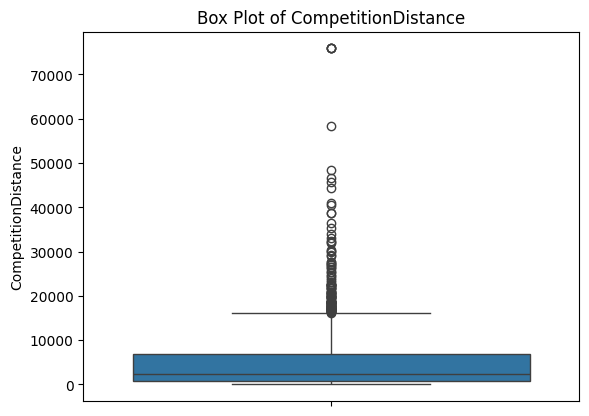

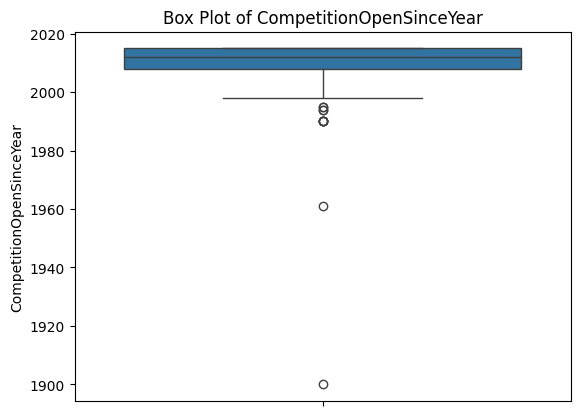

In [26]:
from scripts.data_cleaning import boxPlotForDetectOutliers
boxPlotForDetectOutliers(store_data,['CompetitionDistance','CompetitionOpenSinceYear'])


Remove Outliers

Implement Winsorization  Instead of removing  extreme values, Winsorization replaces them with the nearest threshold value within a defined range.

In [27]:
from scripts.data_cleaning import remove_outliers_winsorization
train_data = remove_outliers_winsorization(train_data,['Sales','Customers'])


2025-01-03 06:33:23,849 - INFO - Removing outliers using winsorization...
2025-01-03 06:33:23,849 - INFO - Removing outliers using winsorization...
2025-01-03 06:33:23,932 - INFO - Winsorizing column 'Sales' with lower bound: -2466.5 and upper bound: 14049.5
2025-01-03 06:33:23,932 - INFO - Winsorizing column 'Sales' with lower bound: -2466.5 and upper bound: 14049.5
2025-01-03 06:33:24,125 - INFO - Winsorizing column 'Customers' with lower bound: -243.0 and upper bound: 1485.0
2025-01-03 06:33:24,125 - INFO - Winsorizing column 'Customers' with lower bound: -243.0 and upper bound: 1485.0


In [28]:

store_data = remove_outliers_winsorization(store_data,['CompetitionDistance','CompetitionOpenSinceYear'])


2025-01-03 06:33:24,193 - INFO - Removing outliers using winsorization...
2025-01-03 06:33:24,193 - INFO - Removing outliers using winsorization...
2025-01-03 06:33:24,221 - INFO - Winsorizing column 'CompetitionDistance' with lower bound: -8557.5 and upper bound: 16182.5
2025-01-03 06:33:24,221 - INFO - Winsorizing column 'CompetitionDistance' with lower bound: -8557.5 and upper bound: 16182.5
2025-01-03 06:33:24,239 - INFO - Winsorizing column 'CompetitionOpenSinceYear' with lower bound: 1997.5 and upper bound: 2025.5
2025-01-03 06:33:24,239 - INFO - Winsorizing column 'CompetitionOpenSinceYear' with lower bound: 1997.5 and upper bound: 2025.5


### check if outliers were removed

#### Training Data

In [29]:
get_outlier_summary(train_data,['Sales','Customers'])


2025-01-03 06:33:24,278 - INFO - Calculating outlier summary for numerical columns...
2025-01-03 06:33:24,278 - INFO - Calculating outlier summary for numerical columns...


From 9 selected numerical columns, there are 0 columns with outlier values.


,Variable,Number of Outliers
0,Sales,0
1,Customers,0


#### Test Data

In [30]:
get_outlier_summary(test_data,['Id','Store','DayOfWeek'])


2025-01-03 06:33:24,508 - INFO - Calculating outlier summary for numerical columns...
2025-01-03 06:33:24,508 - INFO - Calculating outlier summary for numerical columns...


From 8 selected numerical columns, there are 0 columns with outlier values.


,Variable,Number of Outliers
0,Id,0
1,Store,0
2,DayOfWeek,0


#### Store Data

In [31]:
get_outlier_summary(store_data,['CompetitionDistance','CompetitionOpenSinceYear'])


2025-01-03 06:33:24,578 - INFO - Calculating outlier summary for numerical columns...
2025-01-03 06:33:24,578 - INFO - Calculating outlier summary for numerical columns...


From 10 selected numerical columns, there are 0 columns with outlier values.


,Variable,Number of Outliers
0,CompetitionDistance,0
1,CompetitionOpenSinceYear,0


### Box-Plot After Removing Outlier


#### Training Data

2025-01-03 06:33:24,638 - INFO - Creating box plots for outlier detection...
2025-01-03 06:33:24,638 - INFO - Creating box plots for outlier detection...


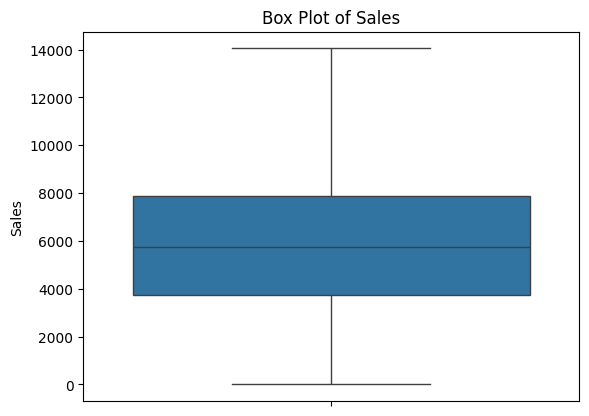

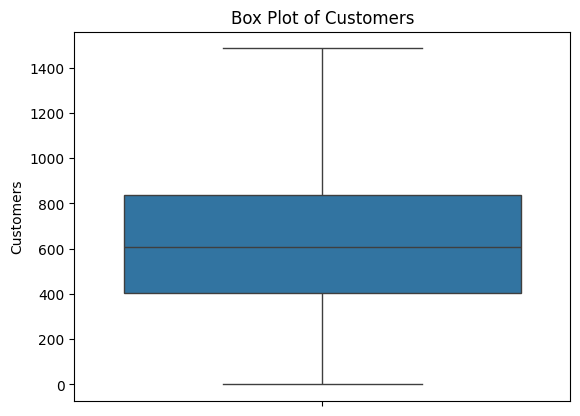

In [32]:
from scripts.data_cleaning import boxPlotForDetectOutliers
boxPlotForDetectOutliers(train_data,['Sales','Customers'])



#### Store Data

2025-01-03 06:33:42,942 - INFO - Creating box plots for outlier detection...
2025-01-03 06:33:42,942 - INFO - Creating box plots for outlier detection...


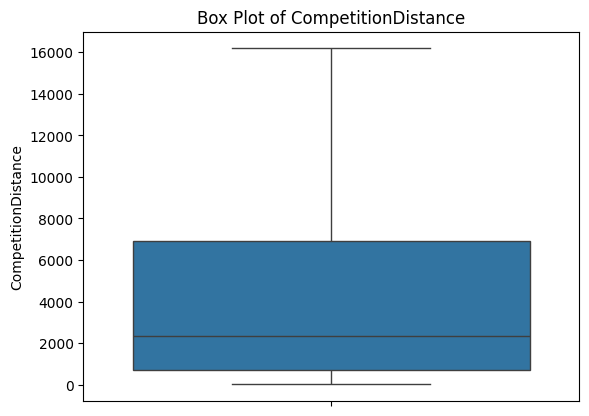

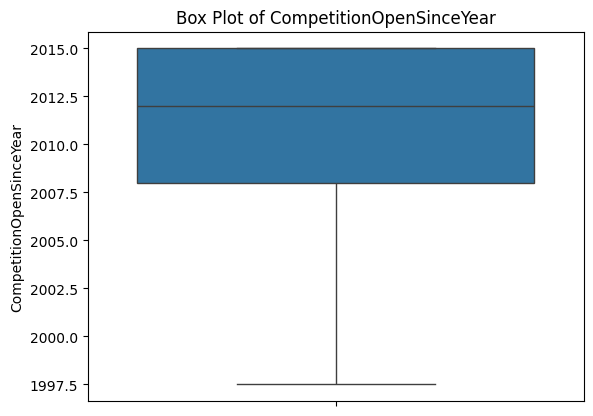

In [33]:
from scripts.data_cleaning import boxPlotForDetectOutliers
boxPlotForDetectOutliers(store_data,['CompetitionDistance','CompetitionOpenSinceYear'])


>>> ### Merge Training And Test Data With Store Dataset


In [34]:

merged_train_data_store = pd.merge(train_data, store_data, on='Store', how='inner')
merged_test_data_store = pd.merge(test_data, store_data, on='Store', how='inner')


In [35]:
merged_train_data_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263.0,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
1,2,5,2015-07-31,6064.0,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314.0,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995.0,1485,1,1,0,1,c,c,620.0,9.0,2009.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
4,5,5,2015-07-31,4822.0,559,1,1,0,1,a,a,16182.5,4.0,2015.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"


In [36]:
merged_train_data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  float64
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [37]:
merged_test_data_store.head()


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,16182.5,4.0,2013.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"


In [38]:
merged_test_data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41088 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        41088 non-null  float64
 11  CompetitionOpenSinceMonth  41088 non-null  float64
 12  CompetitionOpenSinceYear   41088 non-null  float64
 13  Promo2                     41088 non-null  int

#### State Holiday  a = Public Holiday, b = Easter Holiday, c = Christmas 0= None

In [39]:
from scripts.feature_engineering import replace_char_state_holiday


In [40]:
merged_train_data_store['StateHoliday'] = merged_train_data_store['StateHoliday'].apply(replace_char_state_holiday)
merged_train_data_store['StateHoliday'].value_counts()

StateHoliday
Non Holiday       986159
Public Holiday     20260
Easter Holiday      6690
Christmas           4100
Name: count, dtype: int64

#### Assortment level a = basic, b = extra, c = extended

In [41]:
from scripts.feature_engineering import replace_char_assortment


In [42]:
merged_train_data_store['Assortment'] = merged_train_data_store['Assortment'].apply(replace_char_assortment)
merged_train_data_store['Assortment'].value_counts()

Assortment
basic       537445
extended    471470
extra         8294
Name: count, dtype: int64

In [43]:
merged_train_data_store['Date'] = pd.to_datetime(merged_train_data_store['Date'])


In [44]:
from scripts.feature_engineering import create_date_features


In [45]:
create_date_features(merged_train_data_store)

2025-01-03 06:33:48,061 - INFO - Creating date features.
2025-01-03 06:33:48,061 - INFO - Creating date features.


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,IsWeekend
0,1,5,2015-07-31,5263.0,555,1,1,Non Holiday,1,c,...,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2015,7,31,31,1
1,2,5,2015-07-31,6064.0,625,1,1,Non Holiday,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,1
2,3,5,2015-07-31,8314.0,821,1,1,Non Holiday,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,1
3,4,5,2015-07-31,13995.0,1485,1,1,Non Holiday,1,c,...,2009.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2015,7,31,31,1
4,5,5,2015-07-31,4822.0,559,1,1,Non Holiday,1,a,...,2015.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2015,7,31,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0.0,0,0,0,Public Holiday,1,a,...,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0
1017205,1112,2,2013-01-01,0.0,0,0,0,Public Holiday,1,c,...,2006.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0
1017206,1113,2,2013-01-01,0.0,0,0,0,Public Holiday,1,a,...,2015.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0
1017207,1114,2,2013-01-01,0.0,0,0,0,Public Holiday,1,a,...,2015.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0


In [46]:
merged_train_data_store.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'IsWeekend'],
      dtype='object')

### Distribution of promotions in both datasets

In [47]:
from scripts.feature_engineering import distribution_promotions_in_both_datasets


2025-01-03 06:33:51,153 - INFO - Comparing Promo distribution between train and test datasets.
2025-01-03 06:33:51,153 - INFO - Comparing Promo distribution between train and test datasets.
2025-01-03 06:33:51,225 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 06:33:51,225 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 06:33:51,246 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 06:33:51,246 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings

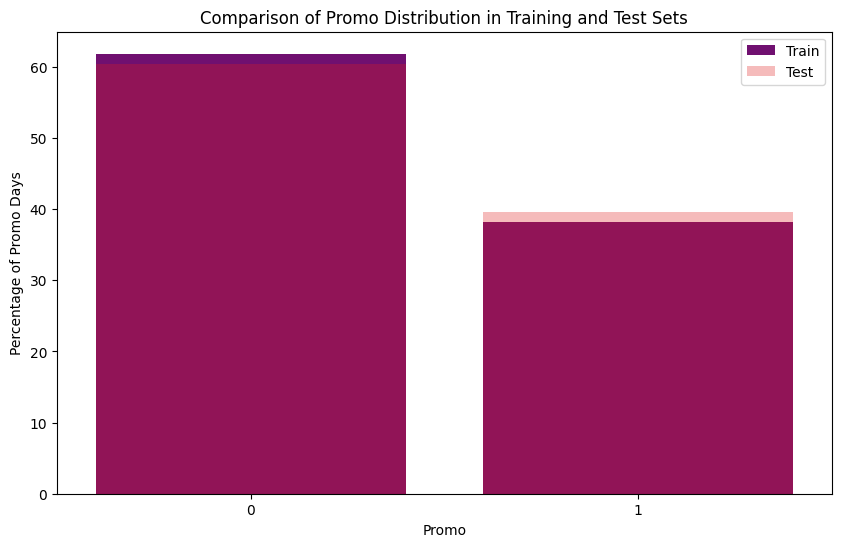

In [48]:
distribution_promotions_in_both_datasets(merged_train_data_store,merged_test_data_store)


### Check & compare sales behavior before, during, and after holidays

### Categorize each day based on the holiday type

In [49]:
from scripts.feature_engineering import categorizeEachDayBasedonHolidayType
merged_train_data_store = categorizeEachDayBasedonHolidayType(merged_train_data_store)


2025-01-03 06:33:51,720 - INFO - Categorizing each day based on holiday type.
2025-01-03 06:33:51,720 - INFO - Categorizing each day based on holiday type.


In [50]:
merged_train_data_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,BeforeHoliday_Public Holiday,SalesPeriod_Public Holiday,HolidayPeriod_Easter Holiday,AfterHoliday_Easter Holiday,BeforeHoliday_Easter Holiday,SalesPeriod_Easter Holiday,HolidayPeriod_Christmas,AfterHoliday_Christmas,BeforeHoliday_Christmas,SalesPeriod_Christmas
0,1,5,2015-07-31,5263.0,555,1,1,Non Holiday,1,c,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
1,2,5,2015-07-31,6064.0,625,1,1,Non Holiday,1,a,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
2,3,5,2015-07-31,8314.0,821,1,1,Non Holiday,1,a,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
3,4,5,2015-07-31,13995.0,1485,1,1,Non Holiday,1,c,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
4,5,5,2015-07-31,4822.0,559,1,1,Non Holiday,1,a,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular


### Calculate average sales during different periods (Before, During, After)

In [51]:
from scripts.feature_engineering import calculateAverageSalesDuringDifferentPeriods
holiday_sales_behavior = calculateAverageSalesDuringDifferentPeriods(merged_train_data_store)


2025-01-03 06:34:37,325 - INFO - Calculating average sales during different periods.
2025-01-03 06:34:37,325 - INFO - Calculating average sales during different periods.


2025-01-03 06:34:37,954 - INFO - Plotting the effect of holidays on sales.
2025-01-03 06:34:37,954 - INFO - Plotting the effect of holidays on sales.


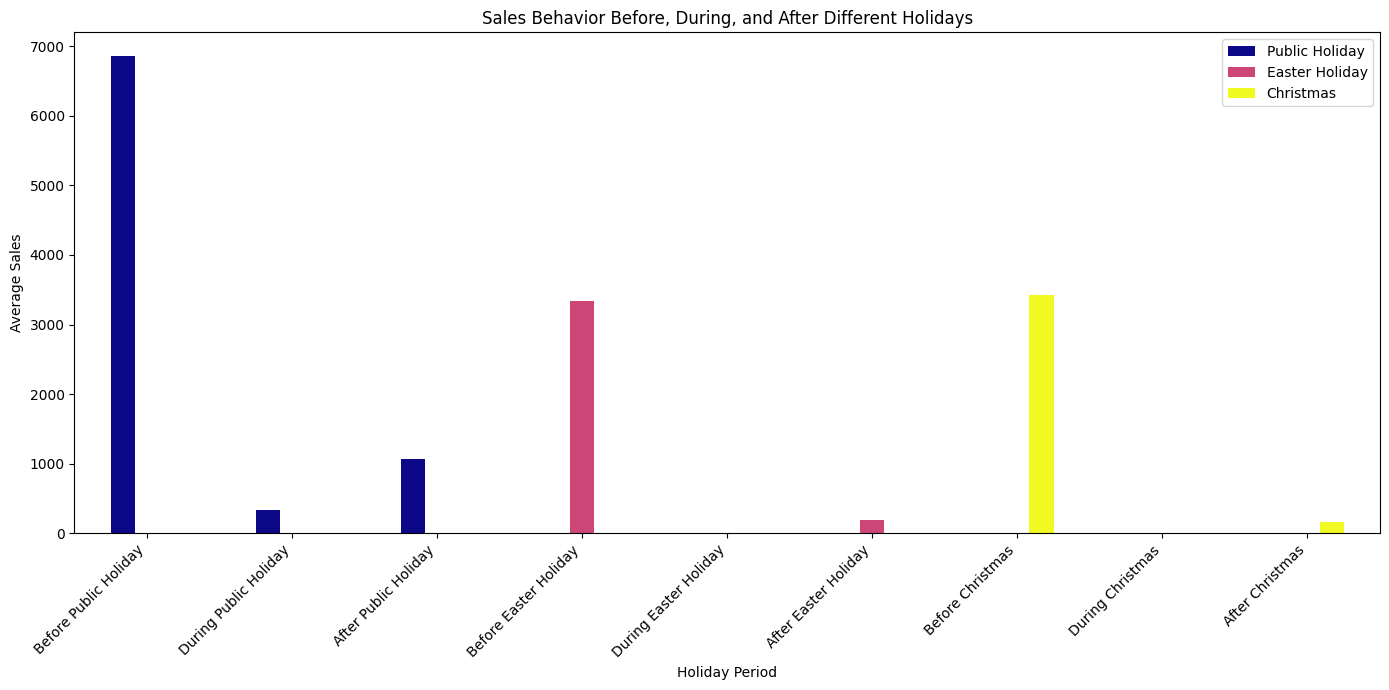

In [52]:
from scripts.feature_engineering import plotEffectOfHolidayOnSales
plotEffectOfHolidayOnSales(holiday_sales_behavior)

In [53]:
merged_train_data_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,BeforeHoliday_Public Holiday,SalesPeriod_Public Holiday,HolidayPeriod_Easter Holiday,AfterHoliday_Easter Holiday,BeforeHoliday_Easter Holiday,SalesPeriod_Easter Holiday,HolidayPeriod_Christmas,AfterHoliday_Christmas,BeforeHoliday_Christmas,SalesPeriod_Christmas
0,1,5,2015-07-31,5263.0,555,1,1,Non Holiday,1,c,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
1,2,5,2015-07-31,6064.0,625,1,1,Non Holiday,1,a,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
2,3,5,2015-07-31,8314.0,821,1,1,Non Holiday,1,a,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
3,4,5,2015-07-31,13995.0,1485,1,1,Non Holiday,1,c,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
4,5,5,2015-07-31,4822.0,559,1,1,Non Holiday,1,a,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
